In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

from functools import reduce
import operator

import seaborn as sns
sns.set_style("whitegrid")

import sklearn

from sklearn.preprocessing import LabelEncoder

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [46]:
# Load the data
df = pd.read_csv("../../data/LPMC/trips.csv")
idx_to_remove = []

Remove males

In [47]:
idx = list(df[(df['female'] == 0)].index)
idx_to_remove.append(random.sample(idx, int(len(idx)*0.5)))

Remove people between 20 and 60

In [48]:
#idx = list(df[(df['age'] >= 20) & (df['age'] <= 60)].index)
idx = list(df[(df['age'] <= 20)].index)
idx_to_remove.append(random.sample(idx, int(len(idx)*0.5)))

Remove people from Central London

In [49]:
idx = list(df[(df['hh_region'] == 'East London')].index)
idx_to_remove.append(random.sample(idx, int(len(idx)*0.5)))

Remove the rows

In [50]:
out = reduce(operator.concat, idx_to_remove)

In [51]:
biased_df = df.drop(out)
biased_df.index = range(len(biased_df))
print(len(biased_df))

tmp = biased_df.sample(len(df), replace=True)
biased_df.to_csv("../../data/LPMC/trips_small_bias.csv", index=False)

10525


In [52]:
biased_df.to_csv("../../data/LPMC/trips_small_bias.csv", index=False)

In [53]:
len(df[(df['hh_region'] == 'East London') & (df['age'] <=20) & (df['female'] == 0)])

274

In [54]:
len(biased_df[(biased_df['hh_region'] == 'East London') & (biased_df['age'] <=20) & (biased_df['female'] == 0)])

5

Check the results

In [38]:
dfs = [df, biased_df]
labels = ['Original', 'Biased']

pal = sns.color_palette("hls", len(labels))
sns.set_palette(pal)

In [39]:
cont_cols = ['start_time_linear', 'age', 'distance', 'dur_walking', 'dur_cycling', 'dur_pt','dur_driving', 'driving_traffic_percent']

msk = []

for i in dfs[0].columns:
    msk.append(i not in cont_cols)

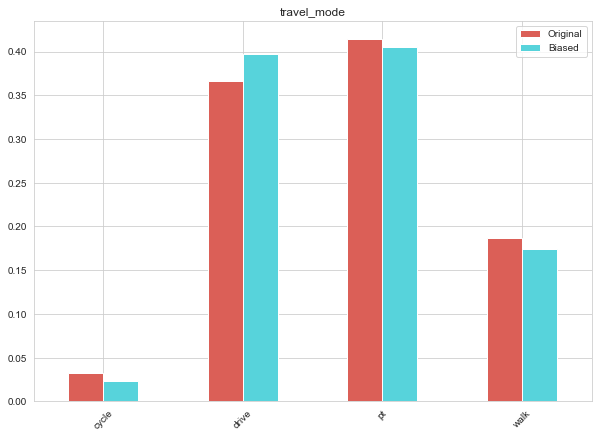

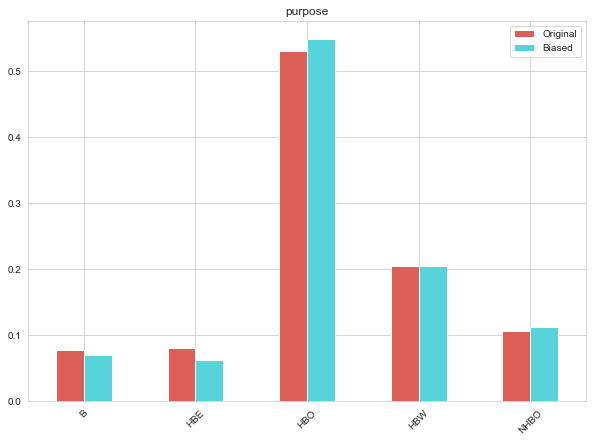

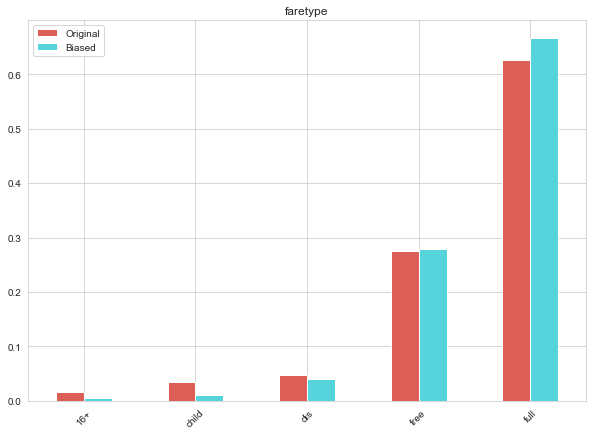

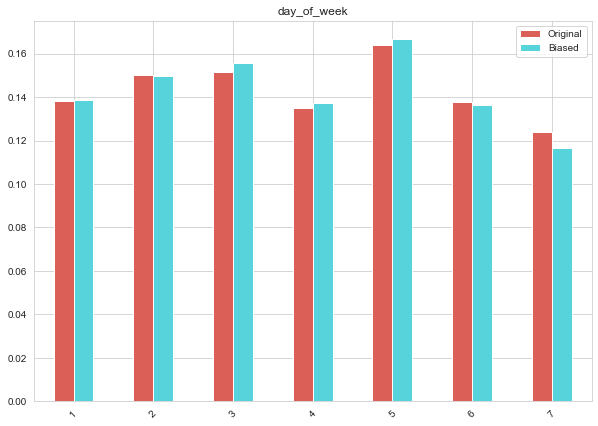

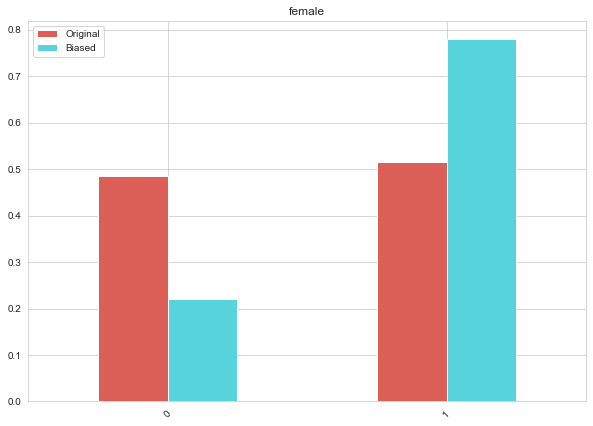

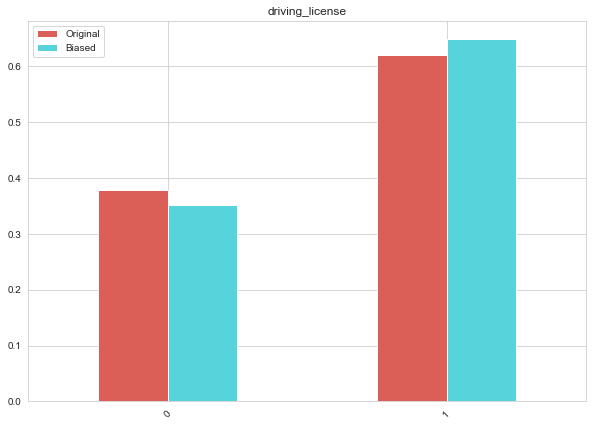

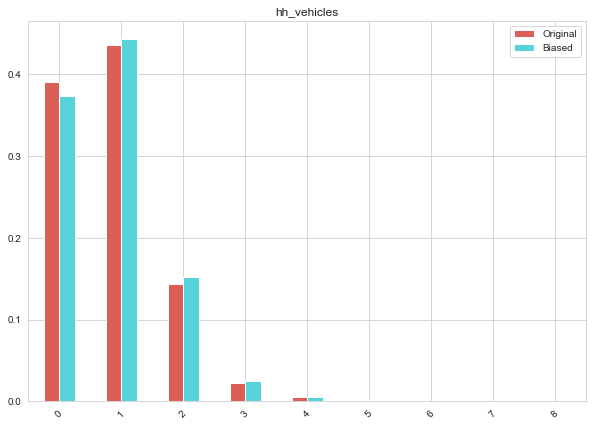

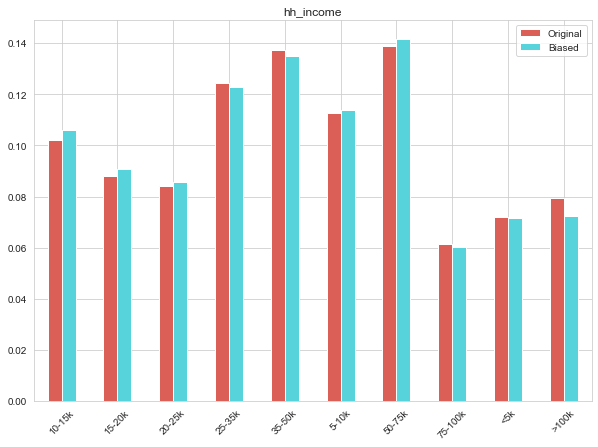

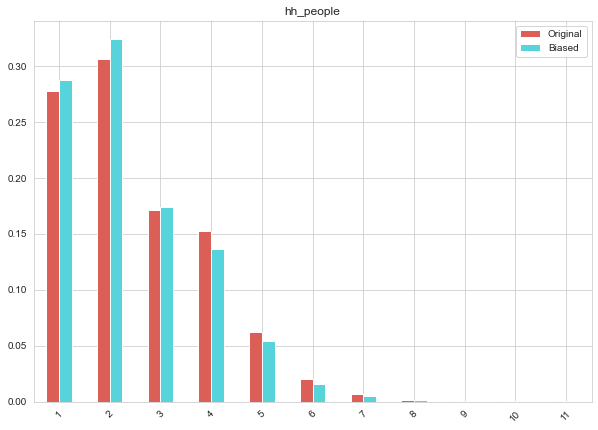

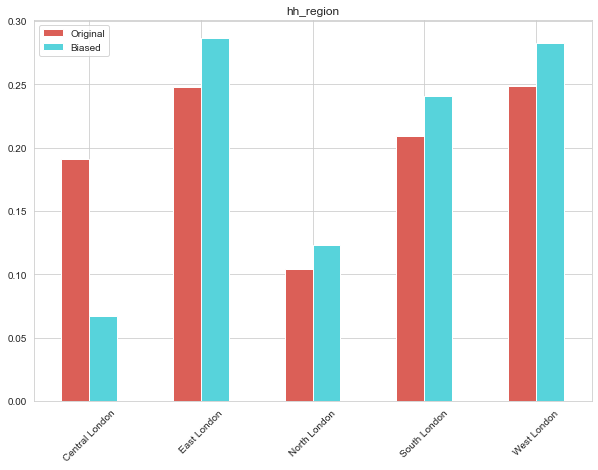

In [40]:
for col in dfs[0].columns[msk]:

    probs = [df[col].value_counts(normalize=True) for df in dfs]

    dct = {}
    for l in labels:
        dct[l] = []

    idx = np.sort(probs[0].index)

    for i in idx:
        for j, l in enumerate(labels):
            try:
                val = probs[j].loc[i]
            except:
                val = 0
            dct[l].append(val)


    tmp_df = pd.DataFrame(dct, index=idx)

    tmp_df.plot(figsize=(10,7), kind='bar')

    plt.legend()
    plt.xticks(rotation=45)

    plt.title(col)

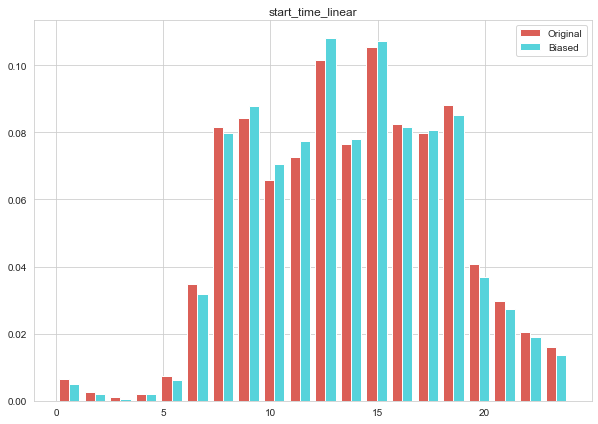

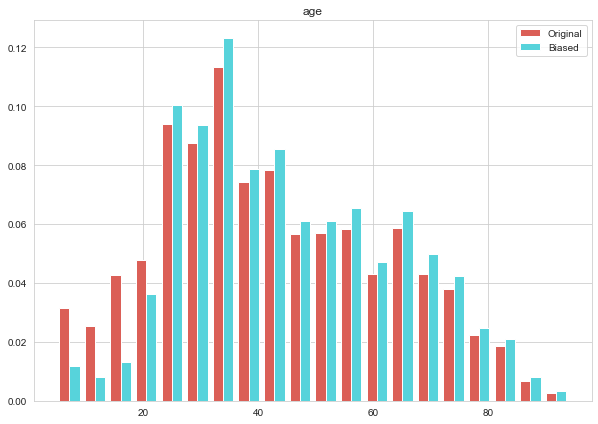

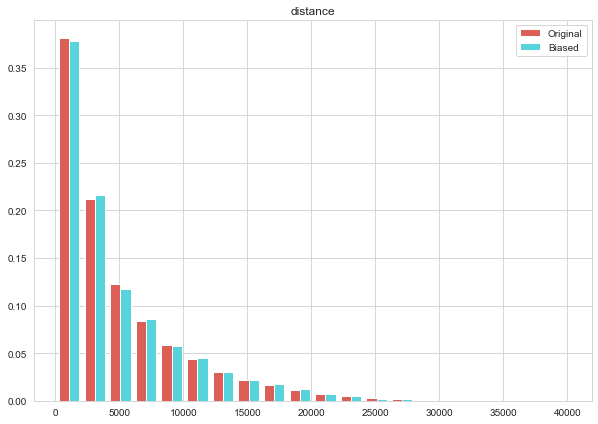

In [41]:
for col in ['start_time_linear', 'age', 'distance']:

    vals = [df[col] for df in dfs]
    weights = [np.ones_like(v)/len(v) for v in vals]

    plt.figure(figsize=(10,7))

    if len(vals) > 1:
        bins = np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1]
    else:
        bins = np.histogram(vals[0], bins=20)[1]

    plt.hist(vals,
             bins=bins, weights = weights,
             label=labels)

    plt.legend()
    plt.title(col)

In [27]:
df.columns

Index(['travel_mode', 'purpose', 'faretype', 'day_of_week',
       'start_time_linear', 'age', 'female', 'driving_license', 'distance',
       'dur_walking', 'dur_cycling', 'dur_driving', 'driving_traffic_percent',
       'hh_vehicles', 'hh_income', 'hh_people', 'dur_pt', 'hh_region'],
      dtype='object')

In [42]:
tmp = df[['age', 'female', 'hh_region', 'distance', 'start_time_linear', 'hh_income', 'hh_vehicles', 'hh_people', 'purpose', 'faretype', 'travel_mode', 'driving_license']]

enc = LabelEncoder()

for c in tmp.columns:

    if tmp[c].dtype == 'object':
        tmp[c] = enc.fit_transform(tmp[c])

C:\Users\glede\AppData\Local\Temp\ipykernel_5740\3395401395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[c] = enc.fit_transform(tmp[c])


<AxesSubplot:>

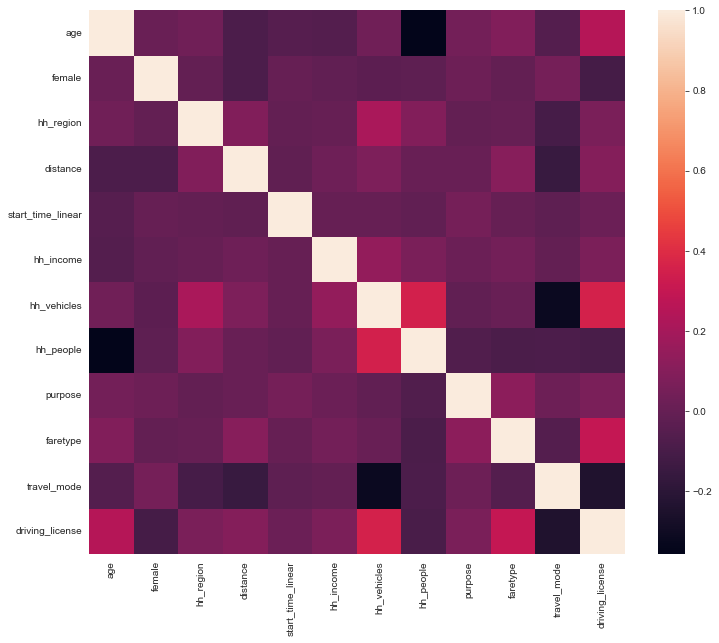

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(tmp.corr())